<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-US-Monthly-Data" data-toc-modified-id="-US-Monthly-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font face="gotham" color="purple"> US Monthly Data</font></a></span></li><li><span><a href="#-US-Daily-Data" data-toc-modified-id="-US-Daily-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font face="gotham" color="purple"> US Daily Data</font></a></span></li><li><span><a href="#-China-Monthly-Data" data-toc-modified-id="-China-Monthly-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font face="gotham" color="purple"> China Monthly Data</font></a></span></li></ul></div>

In [49]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

The purpose of the report is to explore the possible correlation of EPU (Economic Policy Uncertainty) Index with other assets price.

Import the monthly EPU index of US and China.

The monthly data are collected from 10 arge newspapers (USA Today, the Miami Herald, the Chicago Tribune, the Washington Post, the Los Angeles Times, the Boston Globe, the San Francisco Chronicle, the Dallas Morning News, the Houston Chronicle, and the WSJ).

In particular the key words include 'uncertainty' or 'uncertain', the terms 'economic' or 'economy' and one or more of the following terms: 'congress', 'legislation', 'white house', 'regulation', 'federal reserve', or 'deficit'.

# <font face="gotham" color="purple"> US Monthly Data

In [77]:
EPU_US = pd.read_excel('https://www.policyuncertainty.com/media/US_Policy_Uncertainty_Data.xlsx', sheet_name = 1)
EPU_US.dropna()

,Year,Month,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration
0,1985,1.0,103.748802,94.195557,204.033661,13.494806
1,1985,2.0,78.313202,131.445221,136.022430,13.494806
2,1985,3.0,100.761482,131.683533,136.022430,13.494806
3,1985,4.0,84.778870,131.495529,136.022430,13.494806
4,1985,5.0,98.053658,139.016907,170.028061,13.494806
...,...,...,...,...,...,...
421,2020,2.0,216.191208,69.506531,72.472755,282.284149
422,2020,3.0,425.779205,69.506531,72.472755,282.284149
423,2020,4.0,400.944733,69.506531,72.472755,282.284149
424,2020,5.0,498.278168,171.697784,98.969925,282.284149


In [98]:
EPU_US['Month'][:-1].astype(int)

0      1
1      2
2      3
3      4
4      5
      ..
421    2
422    3
423    4
424    5
425    6
Name: Month, Length: 426, dtype: int32

In [107]:
date = EPU_US['Year'].astype(str)+ EPU_US['Month'][:-1].astype(int).astype(str);date

0      19851
1      19852
2      19853
3      19854
4      19855
       ...  
422    20203
423    20204
424    20205
425    20206
426      NaN
Length: 427, dtype: object

In [109]:
EPU_US['Date'] = pd.to_datetime(date, format='%Y%m')

In [112]:
EPU_US.drop(['Year','Month'], inplace=True, axis=1)

In [117]:
EPU_US = EPU_US.set_index('Date')

KeyError: "None of ['Date'] are in the columns"

In [120]:
EPU_US

,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration
Date,,,,
1985-01-01,103.748802,94.195557,204.033661,13.494806
1985-02-01,78.313202,131.445221,136.022430,13.494806
1985-03-01,100.761482,131.683533,136.022430,13.494806
1985-04-01,84.778870,131.495529,136.022430,13.494806
1985-05-01,98.053658,139.016907,170.028061,13.494806
...,...,...,...,...
2020-03-01,425.779205,69.506531,72.472755,282.284149
2020-04-01,400.944733,69.506531,72.472755,282.284149
2020-05-01,498.278168,171.697784,98.969925,282.284149


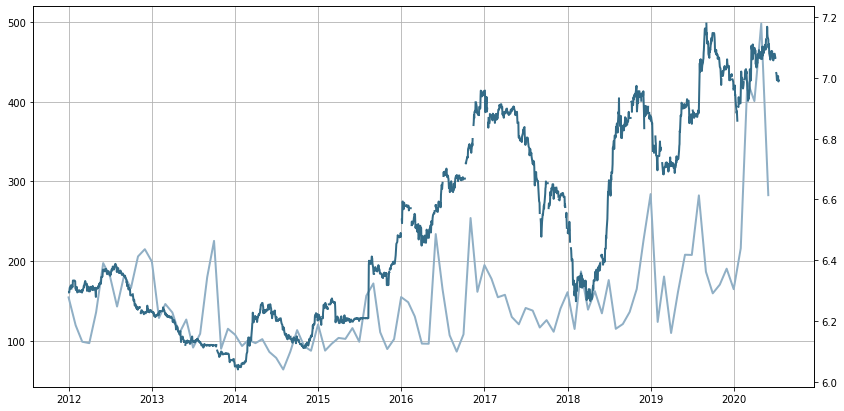

In [129]:
fig, ax = plt.subplots(figsize = (14, 7))
ax.plot()

start = dt.datetime(2012, 1, 1)
end = dt.datetime.today()
USDCNY = pdr.data.DataReader('DEXCHUS', 'fred', start, end)

ax.plot(EPU_US.loc['2012':]['News_Based_Policy_Uncert_Index'], color = '#90afc5', lw = 2)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(USDCNY.loc['2000':], color = '#336b87', lw = 2)
ax.grid()

plt.show()

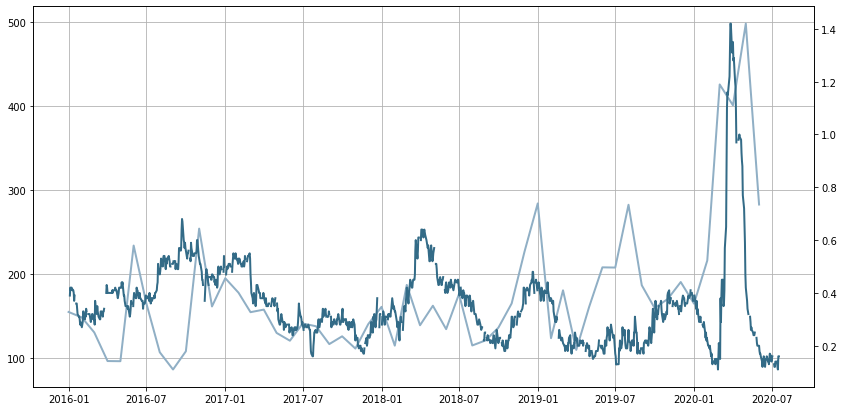

In [182]:
TED = pdr.data.DataReader('TEDRATE', 'fred', start, end)

d = '2016-1-01'
fig, ax = plt.subplots(figsize = (14, 7))
ax.plot(EPU_US.loc[d:]['News_Based_Policy_Uncert_Index'], color = '#90afc5', lw = 2)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(TED.loc[d:], color = '#336b87', lw = 2)
ax.grid()

# <font face="gotham" color="purple"> US Daily Data

Import and join the dates.

In [131]:
EPUD_US = pd.read_csv('https://www.policyuncertainty.com/media/All_Daily_Policy_Data.csv')

In [132]:
EPUD_US['date'] = pd.to_datetime(EPUD_US[['year','month','day']]);EPUD_US.head()

,day,month,year,daily_policy_index,date
0,1,1,1985,103.83,1985-01-01
1,2,1,1985,296.43,1985-01-02
2,3,1,1985,56.06,1985-01-03
3,4,1,1985,118.45,1985-01-04
4,5,1,1985,88.56,1985-01-05


Clean the columns.

In [136]:
EPUD_US = EPUD_US.drop(EPUD_US.columns[[0, 1, 2]], axis=1) 
EPUD_US = EPUD_US.set_index('date')

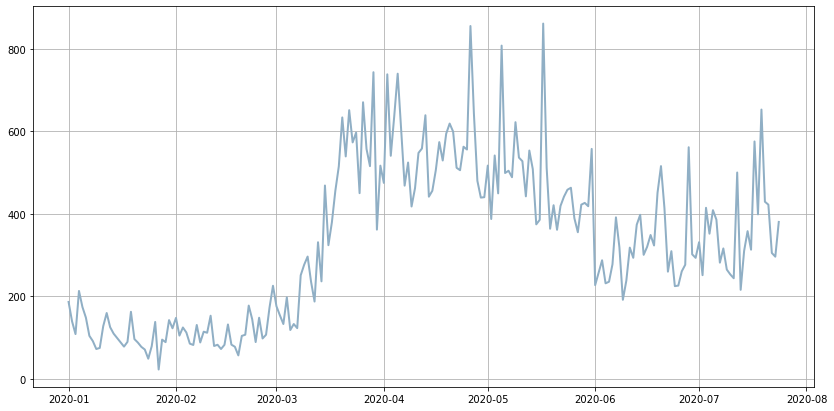

In [137]:
fig, ax = plt.subplots(figsize = (14, 7))
ax.plot(EPUD_US.loc['2020-01-01':], color = '#90afc5', lw = 2)
ax.grid()

In [138]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime.today()
USDCNY = pdr.data.DataReader('DEXCHUS', 'fred', start, end)

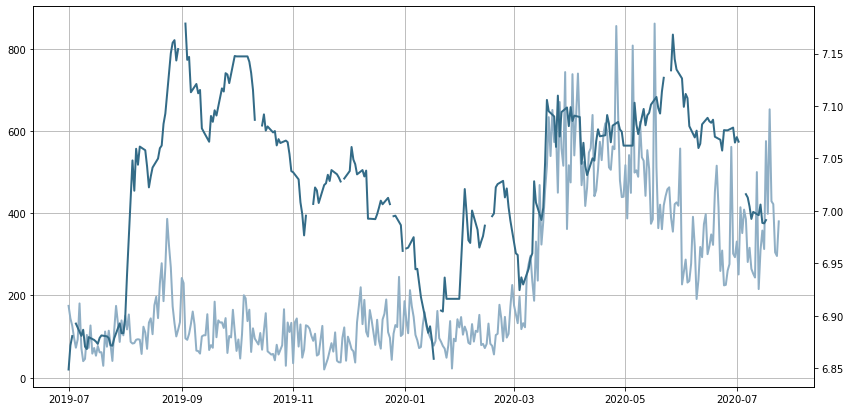

In [139]:
d = '2019-7-01'
fig, ax = plt.subplots(figsize = (14, 7))
ax.plot(EPUD_US.loc[d:], color = '#90afc5', lw = 2)


ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(USDCNY.loc[d:], color = '#336b87', lw = 2)
ax.grid()

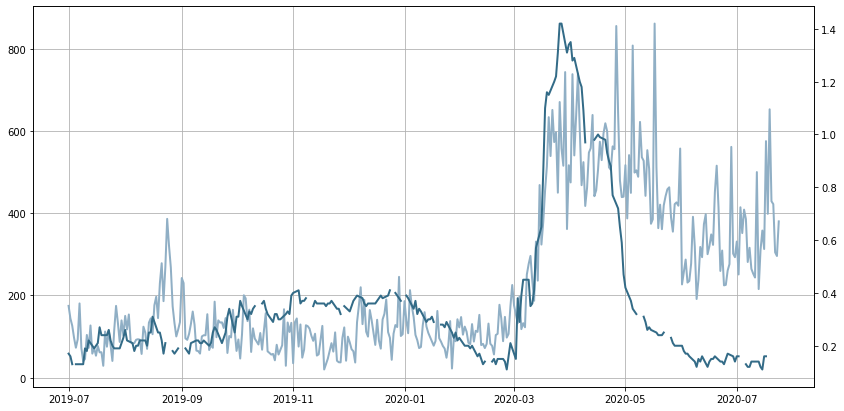

In [179]:
TED = pdr.data.DataReader('TEDRATE', 'fred', start, end)

d = '2019-7-01'
fig, ax = plt.subplots(figsize = (14, 7))
ax.plot(EPUD_US.loc[d:], color = '#90afc5', lw = 2)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(TED.loc[d:], color = '#336b87', lw = 2)
ax.grid()

# <font face="gotham" color="purple"> China Monthly Data

The source for EPU China is from 人民日报(Renmin Daily) and 光明日报(Guangming Daily).

In [157]:
EPU_CN = pd.read_excel('https://www.policyuncertainty.com/media/China_Mainland_Paper_EPU.xlsx', sheet_name = 2)
EPU_CN = EPU_CN.iloc[:, 0:3]; EPU_CN

,year,month,EPU
0,2000,1,58.984504
1,2000,2,15.919179
2,2000,3,46.516847
3,2000,4,28.302973
4,2000,5,31.422031
...,...,...,...
241,2020,2,195.706169
242,2020,3,219.402509
243,2020,4,328.805400
244,2020,5,501.334444


In [158]:
date = EPU_CN['year'].astype(str)+ EPU_CN['month'].astype(str)
EPU_CN['Date'] = pd.to_datetime(date, format='%Y%m')
EPU_CN.drop(['year','month'], inplace=True, axis=1)

In [159]:
EPU_CN = EPU_CN.set_index('Date')

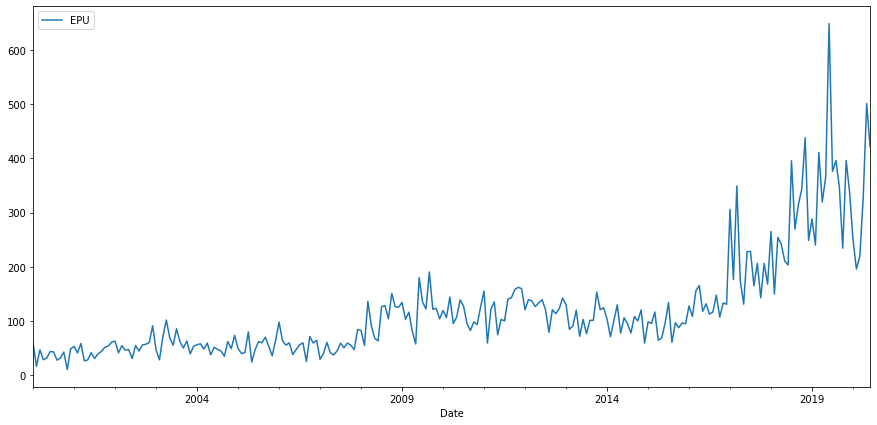

In [161]:
EPU_CN.plot(figsize = (15, 7)); plt.show()

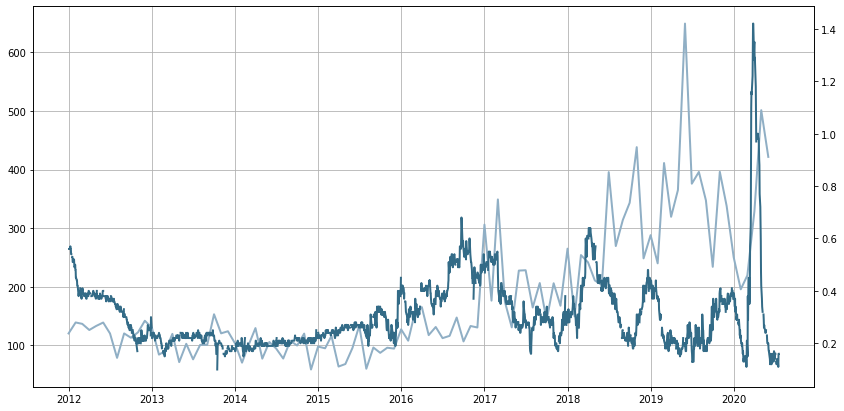

In [177]:
d = '2012-1-01'
fig, ax = plt.subplots(figsize = (14, 7))
ax.plot(EPU_CN.loc[d:], color = '#90afc5', lw = 2)


ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(TED.loc[d:], color = '#336b87', lw = 2)
ax.grid()